# Training regression model using gradient descent

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # required even though not ref'd!
import random
from matplotlib import rcParams

EXACT_COEFF = [-2977.3484892930505, 113.13288354356122]

rcParams["font.size"] = 12

def line_fit(B, x):
    return B[2-1]*x + B[1-1]

## Load data

In [2]:
df = pd.read_csv('data/cheese_deaths.csv')
df

,years,cheese,deaths
0,2000,29.8,327
1,2001,30.1,456
2,2002,30.5,509
3,2003,30.6,497
4,2004,31.3,596
5,2005,31.7,573
6,2006,32.6,661
7,2007,32.7,809
8,2008,32.8,717
9,2009,33.1,741


## Reproduce plots

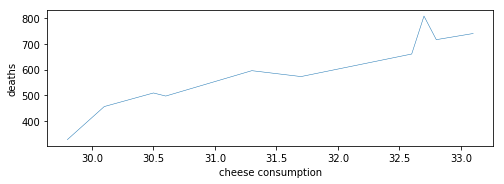

In [4]:
fig, ax1 = plt.subplots(figsize=(8,2.5))
...
plt.show()

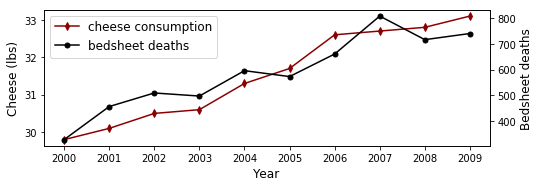

In [3]:
...

## Define cost function and gradient

In [5]:
def MSE(B):
    """
    Compute and return the mean squared error with:
    (x_i, y_i) = (df.cheese, df.deaths).
    The line coefficients are B = [y-intercept, slope].
    """


In [18]:
def MSE_gradient(B):
    """
    Compute and return the gradient vector containing the partial derivatives
    of the MSE cost function with respect to b_1 and b_2. Don't scale by 2
    and divide by the number of observations as it's a waste of computation.
    We can adjust the learning rate to take this into consideration.
    """


## Define minimize function

In [19]:
def minimize(B0, eta, precision):
    """
    Minimize the MSE cost function starting at model parameters B0
    and using learning rate vector eta. The model has converged when
    the change in MSE from one iteration to the next is less than
    precision. Return both the B at which your algorithm converged
    and also the list of B points between B0 and converged B, inclusively.
    """
    trace = []


In [8]:
LEARNING_RATES = [0.02,0.0001]
PRECISION = 0.000000001 # can't be too small as x-xprev prec is low
B0 = np.array([random.randrange(-6000, 4000), random.randrange(-200, 300)])

In [20]:
%time B,trace = minimize(B0, LEARNING_RATES, PRECISION)

CPU times: user 7.22 s, sys: 262 ms, total: 7.49 s
Wall time: 7.51 s


In [9]:
print(f"descent gives {B} in {len(trace)} steps")
print(f"exact   is    {EXACT_COEFF}")
print(f"cost of approx is {MSE(B):1.10f}")
print(f"cost of exact  is {MSE(EXACT_COEFF):1.10f}")

descent gives [-2977.30834673   113.13161144] in 47004 steps
exact   is    [-2977.3484892930505, 113.13288354356122]
cost of approx is 2004.4563237107
cost of exact  is 2004.4563215019


## Draw heatmap with trace

In [10]:
def get_surface(Cost, b1, b2):
    """
    Given an arbitrary function of two scalar parameters, f,
    return a list of lists, C, containing f evaluated at f(b1[i],b2[j]). i is the
    b_1 coordinate and j is the b_2 coordinate. b_1 is the np.arange of
    y-intercept values and b_2 is the np.arange of slope values.
    """


In [13]:
def heatmap(b0, b1, C, trace): # trace is a list of [b1, b2] pairs
    """
    Given b0 and b1, y-intercept and slope values, and cost 2D matrix, plot
    a heatmap using plt.imshow(). Make the heat map look like those in
    the project description.
    
    Once the heat map is displayed, plot the trace coordinates in color
    #FEE08F. Plot the first coordinate in color #FB060B and the last
    coordinate in black.
    
    Returns nothing.
    """
    fig = plt.figure(figsize=(6,6))
    ...
    plt.imshow(C,
        origin='lower',
        cmap='coolwarm',
        alpha=0.65,
        ...
    )
    ...
    # Plot all trace cordinates at once instead of using a Python loop
    # (MUCH faster this way)
    ax.plot(trace[:,0], trace[:,1], color='#FEE08F', marker='.', markersize=.1)    
    ...

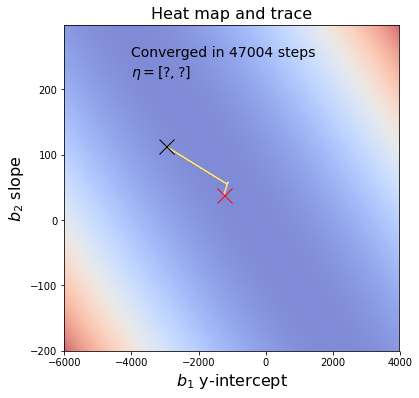

In [14]:
b1 = np.arange(-6000, 4000, 30)  # y intercept
b2 = np.arange(-200, 300, 1)     # slope
C = get_surface(MSE, b1, b2)
heatmap(b1, b2, C, trace)